### Slade Brooks
##### brooksl@mail.uc.edu
##### 03.10.2023
# AeroComputing Assignment 6

This code does a thing

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Part 1

Use symbolab to find derivatives:

$$
\text{v}(M) = \sqrt{\frac{\gamma +1}{\gamma -1}} \tan^{-1}{(\sqrt{\frac{\gamma -1}{\gamma +1}(M^2-1)})} - \tan^{-1}{(\sqrt{M^2-1})}
$$

$$
\dot{\text{v}}(M) = \frac{2\sqrt{M^2-1}}{\gamma M^3 - M^3 + 2M}
$$

$$
\ddot{\text{v}}(M) = \frac{2(-2\gamma M^4 + 2M^4 + 3\gamma M^2 - 3M^2 + 2)}{M^2(\gamma M^2 - M^2 +2)^2\sqrt{M^2-1}}
$$

We will also take the derivatives with sympy and check them with these results b/c im not typing allat

# Part 2

In [2]:
# set up sympy
M, y = sp.symbols("M, y")
pran = (sp.sqrt((y+1)/(y-1)))*sp.atan(sp.sqrt((y-1)/(y+1)*(sp.Pow(M, 2) - 1))) - sp.atan(sp.sqrt(sp.Pow(M, 2) - 1))
prandot = sp.diff(pran, M)
pranddot = sp.diff(prandot, M)

In [3]:
# set up nums to loop through
gamma = 1.4
Ms = np.linspace(1, 5, 30)
deltaM = 0.01

In [4]:
# find real derivs
prandotreal = np.empty(len(Ms))
pranddotreal = np.empty(len(Ms))

for i in range(0, len(Ms)):
    prandotreal[i] = prandot.subs([(M, Ms[i]), (y, gamma)])
    pranddotreal[i] = pranddot.subs([(M, Ms[i]), (y, gamma)])

## Part A

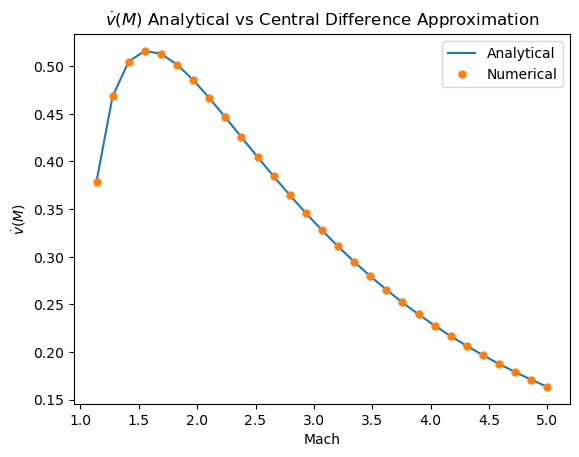

In [5]:
# central diff 1st deriv
def centdif1(f, Ms, dM, gam):
    return (f.subs([(M, (Ms + dM)), (y, gam)]) - f.subs([(M, (Ms - dM)), (y, gam)]))/(2*dM)

# make list of results
prandotCD = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(centdif1(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        prandotCD[i] = centdif1(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        prandotCD[i] = None

# plot it
plt.plot(Ms, prandotreal, label="Analytical")
plt.plot(Ms, prandotCD, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\dot{v}(M)$")
plt.title("$\dot{v}(M)$ Analytical vs Central Difference Approximation")
plt.show()

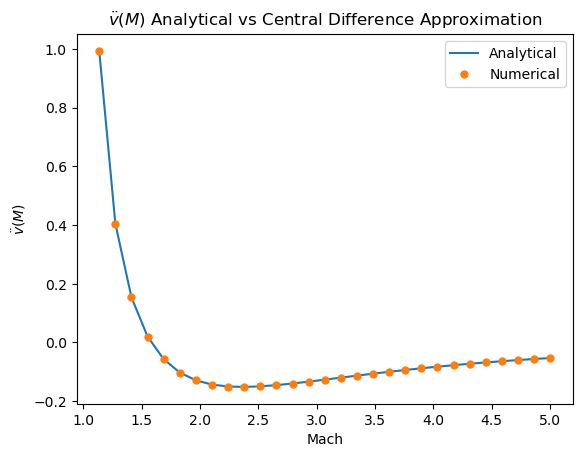

In [6]:
# central diff 2nd deriv
def centdif2(f, Ms, dM, gam):
    return (f.subs([(M, (Ms + dM)), (y, gam)]) - 2*f.subs([(M, Ms), (y, gam)]) + f.subs([(M, (Ms - dM)), (y, gam)]))/(dM**2)

# make list of results
pranddotCD = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(centdif2(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        pranddotCD[i] = centdif2(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        pranddotCD[i] = None

# plot it
plt.plot(Ms, pranddotreal, label="Analytical")
plt.plot(Ms, pranddotCD, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\ddot{v}(M)$")
plt.title("$\ddot{v}(M)$ Analytical vs Central Difference Approximation")
plt.show()

## Part B

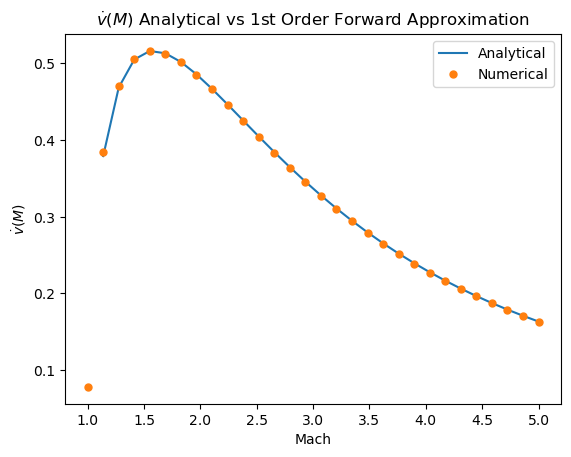

In [7]:
# 1st order forward 1st deriv
def for11(f, Ms, dM, gam):
    return (f.subs([(M, (Ms + dM)), (y, gam)]) - f.subs([(M, Ms), (y, gam)]))/dM

# make list of results
prandotfor1 = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(for11(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        prandotfor1[i] = for11(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        prandotfor1[i] = None

# plot it
plt.plot(Ms, prandotreal, label="Analytical")
plt.plot(Ms, prandotfor1, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\dot{v}(M)$")
plt.title("$\dot{v}(M)$ Analytical vs 1st Order Forward Approximation")
plt.show()

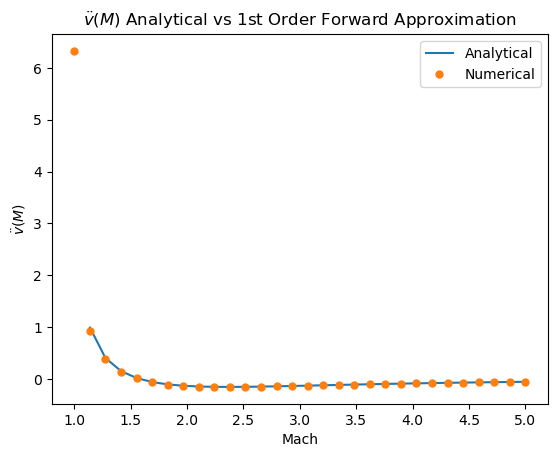

In [8]:
# 1st order forward 2nd deriv
def for12(f, Ms, dM, gam):
    return (f.subs([(M, (Ms + 2*dM)), (y, gam)]) - 2*f.subs([(M, (Ms + dM)), (y, gam)]) + f.subs([(M, Ms), (y, gam)]))/(dM**2)

# make list of results
pranddotfor1 = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(for12(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        pranddotfor1[i] = for12(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        pranddotfor1[i] = None

# plot it
plt.plot(Ms, pranddotreal, label="Analytical")
plt.plot(Ms, pranddotfor1, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\ddot{v}(M)$")
plt.title("$\ddot{v}(M)$ Analytical vs 1st Order Forward Approximation")
plt.show()

## Part C

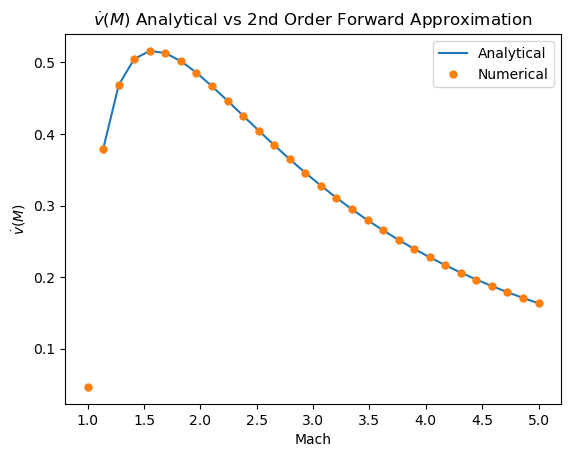

In [9]:
# 2nd order forward 1st deriv
def for21(f, Ms, dM, gam):
    return (-f.subs([(M, (Ms + 2*dM)), (y, gam)]) + 4*f.subs([(M, (Ms + dM)), (y, gam)]) - 3*f.subs([(M, Ms), (y, gam)]))/(2*dM)

# make list of results
prandotfor2 = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(for21(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        prandotfor2[i] = for21(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        prandotfor2[i] = None

# plot it
plt.plot(Ms, prandotreal, label="Analytical")
plt.plot(Ms, prandotfor2, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\dot{v}(M)$")
plt.title("$\dot{v}(M)$ Analytical vs 2nd Order Forward Approximation")
plt.show()

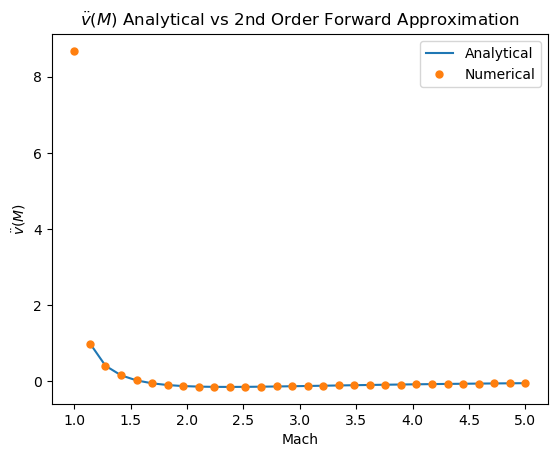

In [10]:
# 2nd order forward 1st deriv
def for22(f, Ms, dM, gam):
    return (4*f.subs([(M, (Ms + 2*dM)), (y, gam)]) - 5*f.subs([(M, (Ms + dM)), (y, gam)]) + 2*f.subs([(M, Ms), (y, gam)])\
             - f.subs([(M, (Ms + 3*dM)), (y, gam)]))/(dM**2)

# make list of results
pranddotfor2 = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(for22(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        pranddotfor2[i] = for22(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        pranddotfor2[i] = None

# plot it
plt.plot(Ms, pranddotreal, label="Analytical")
plt.plot(Ms, pranddotfor2, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\ddot{v}(M)$")
plt.title("$\ddot{v}(M)$ Analytical vs 2nd Order Forward Approximation")
plt.show()

# Part 3

In [11]:
# set up dMs
dMs = np.empty(16)
dMs[0] = 0.1
for i in range(1, 16):
    dMs[i] = 0.1*dMs[i-1]

In [12]:
def plotdms(Ms, dMs, err, title):
    # change colors
    colors = plt.cm.jet(np.linspace(0, 1, 16))
    for i in range(0, len(dMs)):
        plt.plot(Ms, err[:, i], label="{:.0E}".format(dMs[i]), color=colors[i])
    plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.xlabel("Mach")
    plt.ylabel("Error")
    plt.show()

## Cent Dif 1st Deriv

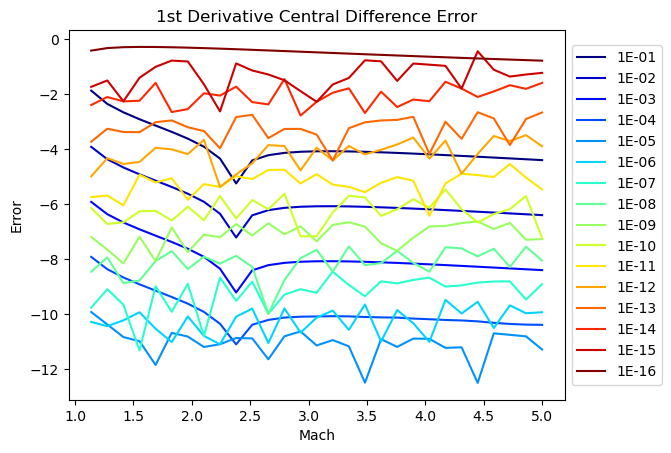

In [13]:
# make err list
err = np.empty((len(Ms), len(dMs)))

# find error for each dM
for i in range(0, len(dMs)):
    for k in range(0, len(Ms)):
        if type(centdif1(pran, Ms[k], dMs[i], gamma)) != sp.core.add.Add:
            prandotCD[k] = centdif1(pran, Ms[k], dMs[i], gamma)
        else:
            # get rid of undefined points
            prandotCD[k] = None
        err[k, i] = np.log10(np.abs(prandotreal[k] - prandotCD[k]))

plotdms(Ms, dMs, err, "1st Derivative Central Difference Error")

## Cent Dif 2nd Deriv

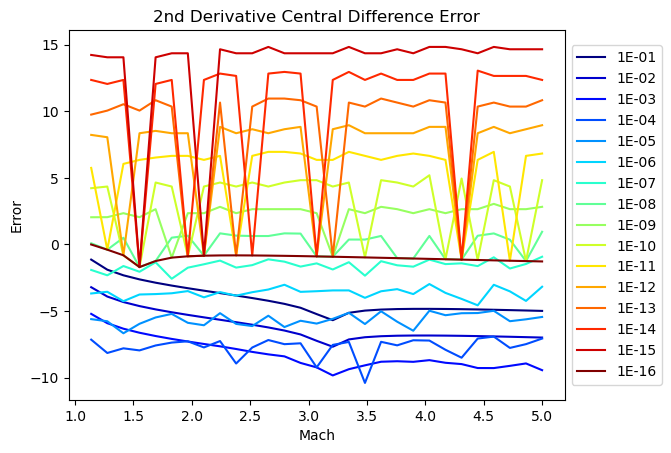

In [14]:
# make err list
err = np.empty((len(Ms), len(dMs)))

# find error for each dM
for i in range(0, len(dMs)):
    for k in range(0, len(Ms)):
        if type(centdif2(pran, Ms[k], dMs[i], gamma)) != sp.core.add.Add:
            pranddotCD[k] = centdif2(pran, Ms[k], dMs[i], gamma)
        else:
            # get rid of undefined points
            pranddotCD[k] = None
        err[k, i] = np.log10(np.abs(pranddotreal[k] - pranddotCD[k]))

plotdms(Ms, dMs, err, "2nd Derivative Central Difference Error")

## 1st Forward 1st Deriv

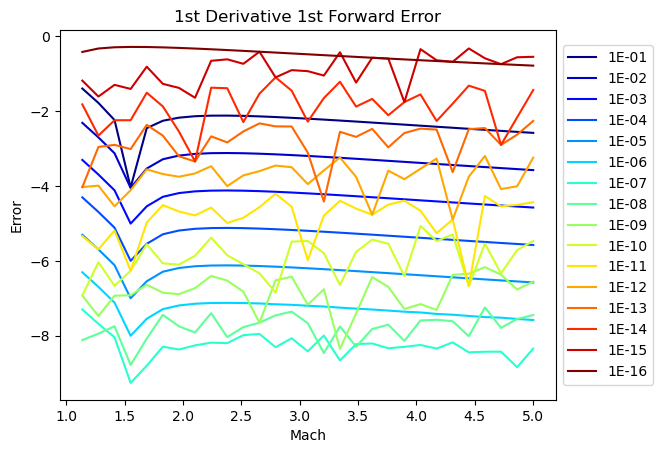

In [15]:
# make err list
err = np.empty((len(Ms), len(dMs)))

# find error for each dM
for i in range(0, len(dMs)):
    for k in range(0, len(Ms)):
        if type(for11(pran, Ms[k], dMs[i], gamma)) != sp.core.add.Add:
            prandotfor1[k] = for11(pran, Ms[k], dMs[i], gamma)
        else:
            # get rid of undefined points
            prandotfor1[k] = None
        err[k, i] = np.log10(np.abs(prandotreal[k] - prandotfor1[k]))

plotdms(Ms, dMs, err, "1st Derivative 1st Forward Error")

## 1st Forward 2nd Deriv

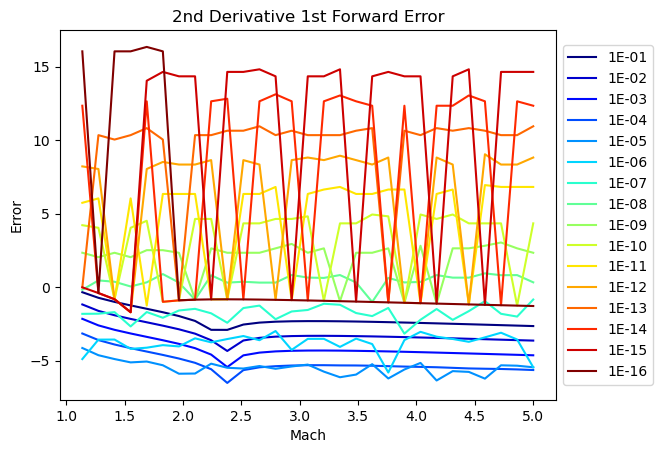

In [16]:
# make err list
err = np.empty((len(Ms), len(dMs)))

# find error for each dM
for i in range(0, len(dMs)):
    for k in range(0, len(Ms)):
        if type(for12(pran, Ms[k], dMs[i], gamma)) != sp.core.add.Add:
            pranddotfor1[k] = for12(pran, Ms[k], dMs[i], gamma)
        else:
            # get rid of undefined points
            pranddotfor1[k] = None
        err[k, i] = np.log10(np.abs(pranddotreal[k] - pranddotfor1[k]))

plotdms(Ms, dMs, err, "2nd Derivative 1st Forward Error")

## 2nd Forward 1st Deriv

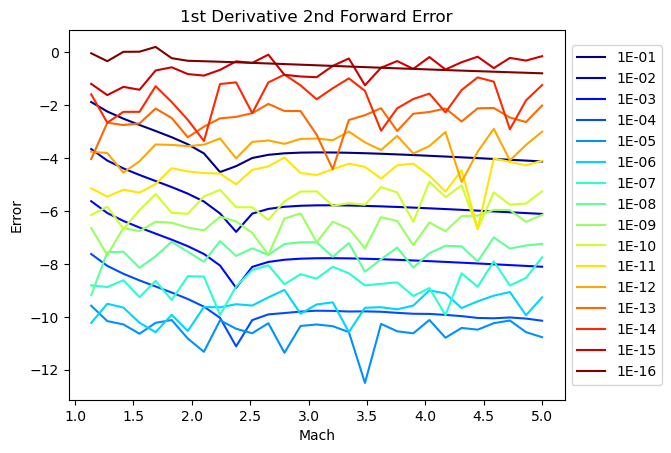

In [17]:
# make err list
err = np.empty((len(Ms), len(dMs)))

# find error for each dM
for i in range(0, len(dMs)):
    for k in range(0, len(Ms)):
        if type(for21(pran, Ms[k], dMs[i], gamma)) != sp.core.add.Add:
            prandotfor2[k] = for21(pran, Ms[k], dMs[i], gamma)
        else:
            # get rid of undefined points
            prandotfor2[k] = None
        err[k, i] = np.log10(np.abs(prandotreal[k] - prandotfor2[k]))

plotdms(Ms, dMs, err, "1st Derivative 2nd Forward Error")

## 2nd Forward 2nd Deriv

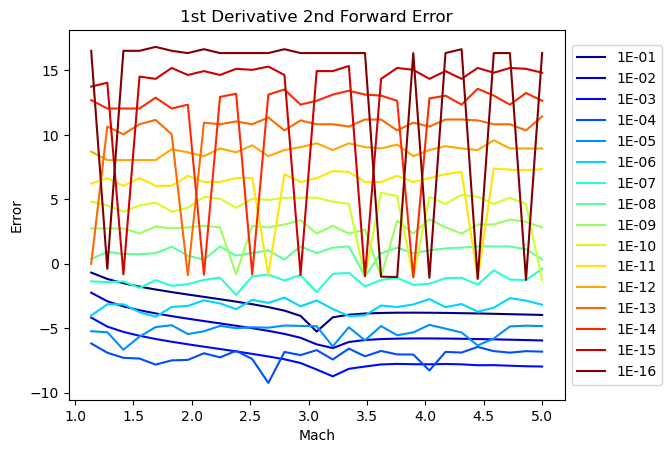

In [18]:
# make err list
err = np.empty((len(Ms), len(dMs)))

# find error for each dM
for i in range(0, len(dMs)):
    for k in range(0, len(Ms)):
        if type(for22(pran, Ms[k], dMs[i], gamma)) != sp.core.add.Add:
            pranddotfor2[k] = for22(pran, Ms[k], dMs[i], gamma)
        else:
            # get rid of undefined points
            pranddotfor2[k] = None
        err[k, i] = np.log10(np.abs(pranddotreal[k] - pranddotfor2[k]))

plotdms(Ms, dMs, err, "1st Derivative 2nd Forward Error")

# Part 4

## Part A

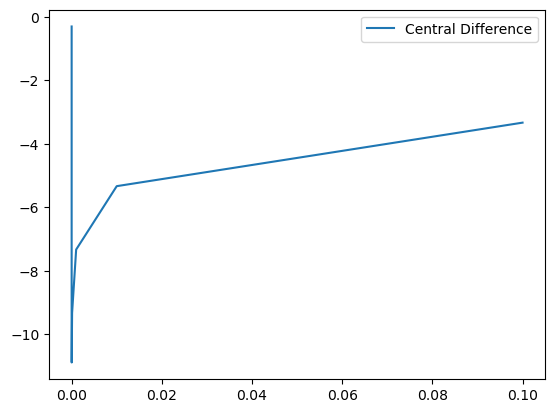

In [31]:
# find error @ each dM
errorsCD1 = np.empty(len(dMs), dtype="float64")
prandotreal18 = np.array([prandot.subs([(M, 1.8), (y, gamma)])], dtype="float64")
prandotCD18 = np.empty(1, dtype="float64")

for i in range(len(dMs)):
    if type(centdif1(pran, 1.8, dMs[i], gamma)) != sp.core.add.Add:
        prandotCD18[0] = centdif1(pran, 1.8, dMs[i], gamma)
    else:
        prandotCD18[0] = 0.0
    errorsCD1[i] = np.log10(np.abs(prandotreal18[0] - prandotCD18[0]))

plt.plot(dMs, errorsCD1, label="Central Difference")
plt.legend(loc = "upper right")
plt.show()

## Part B

## Part C